# CSCI4022 Homework 3; Clustering

## Due Monday, February 22 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


***
<a/ id='p4'></a>
[Back to top](#top)
# Problem 1 (Theory: GMM; 5 pts) 
In the GMM slides, we stated that the weights $w_m$ of the 1-dimensional GMM with pdf

$f(x|\theta)=w_1\phi(x|\mu_1, \sigma_1^2)+w_2\phi(x|\mu_2, \sigma_2^2)+\dots+ w_m\phi(x|\mu_m, \sigma_m^2)$

required the weights to sum to one.  

#### a) Use the following markdown cell to prove this statement.  In a sentence, describe how this proof might change in higher dimensions.

#### b) Is it possible to have a valid pdf $f(x)$ above if any of the weights $w_k$ are negative?  If not, why not?  If so, what other difficulties might be associated with negative weights?

# Problem 2 (Simulation: GMMs and simulated data; 20 pts)

The code below loads up a dataset tracking the eruptions of the geyser Old Faithful in Yellowstone.  It has two features:

- eruptions; numeric; Eruption time in mins
- waiting; numeric; Waiting time to next eruption (in mins)

As the plot shows, these two variables are highly related, and we observe a data set that clearly has multiple distinct modes.

Our goal in this problem is not only to capture the data set with the GMM, but to capture it well enough to simulate *new* eruptions from the original distribution.

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


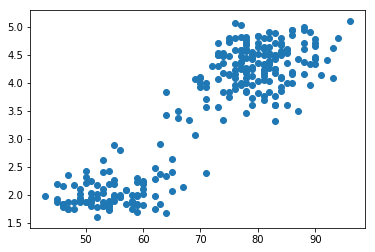

In [2]:
ff= sm.datasets.get_rdataset('faithful').data
print(ff.head())
plt.scatter(ff['waiting'], ff['eruptions'])

## Part A: Fit Models

Run 5 different 2-D Gaussian Mixture Models on the given data with $k=2, 4, 6, 8, 10$ components.  You may use any form of intialization, but I recommend randomness for ease of use/repetition.

Plot their "elbow plot" of $k$ versus mean-distance-to-centroid.  Does it look like there is a best choice of $k$ from these options?  Does this match your intuition?  Explain.

## Part B: Simulate from Models

Because the GMM is a *generative* model, we could use our results from part $A$ to not only score models based on their mean-distance-to-centroid (or other statistical measures like AIC, BIC), we could simulate points from the models and visually ascertain whether or not they appear similar to the original distribution.

For each of the 5 GMM models in part a), simulate 272 points from your estimated density function (recall: this is a two-part simulation of choosing a component **then** drawing from the normal of appropriate mean/covariance).

Create a figure with 2 columns and 3 rows holding all 6 data sets: the 5 simulated ones and the original data shown above.  Label each plot appropriately.  

## Part C: Discussion

Which plot or plots look closest to the original data?  Depending on your interpretations of the elbow plot versus the simulated data, you may have decided that we wanted a different value of $k$ for the best model to *simulate* from rather than the best model to *cluster* or classify upon.  Do you think that this is normally the case?  Why or why not?  What properties of a data set would make one task easier or harder with more or less $k$?



# Problem 3 (Practice:k-means and clustering similarities; 20 pts)

Our goal in this problem is to get a better understanding of two important facets of clustering: ways to compare between clusters and how much initialization might matter for e.g. kmeans.

The code below loads up a well known dataset extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).  The columns are:

- mpg:	Miles/(US) gallon
- cyl:	Number of cylinders
- disp:	Displacement (cu.in.)
-  hp:	Gross horsepower
- drat:	Rear axle ratio
- wt:	Weight (1000 lbs)
- qsec:	1/4 mile time
- vs:	Engine (0 = V-shaped, 1 = straight)
- am:	Transmission (0 = automatic, 1 = manual)
- gear:	Number of forward gears
- carb:	Number of carburetors

We're going to attempt to cluster this data using **4** of these columns: mpg, disp, wt, and qsec.

                mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
Mazda RX4      21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
Datsun 710     22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1


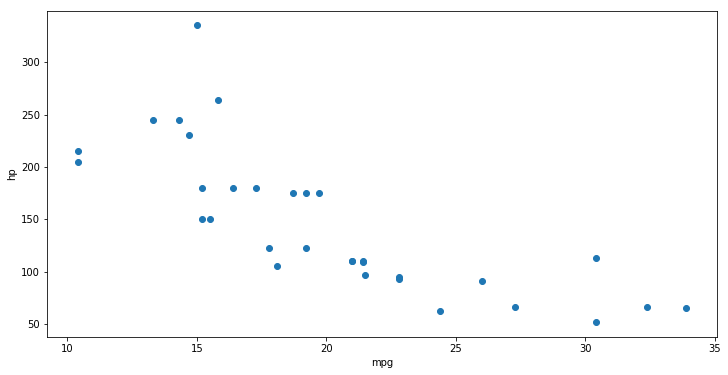

In [3]:
cars= sm.datasets.get_rdataset('mtcars').data
print(cars.head(3))

#example plot of mpg x hp
fig, ax= plt.subplots(figsize=(12,6))
plt.scatter(cars['mpg'], cars['hp'])
ax.set_xlabel('mpg')
ax.set_ylabel('hp');

## Part A) K-means and Normalization: Intuition

The first question we should ask is whether or not to normalize our data.  Use the pandas methods `describe` on the data frame.  What do you expect to happen if we cluster without normalizing the data?  Why?



## Part B) K-means and Normalization: First Clusters 

Now do initial, unnormalized clustering for $k=3$.  Save the final cluster for each point.  Plot the final clusters on an `mpg` versus `disp` axis.

## Part C) K-means and Normalization: An Alternative

Normalize the 4 columns being used by replacing each with their Box-Muller transformation (for each column, subtract the mean of that column then divide by its standard deviation).  Repeat your clustering for $k=3$, again saving the final cluster for each point.  Plot the final clusters on an `mpg` versus `disp` axis.

Then answer: do the clusterings look different?



## Part D) The Rand Statistic
We need to formalize wheter or not normalizing actually mattered, which requires a measurement of whether or not two clusterings are actually different from one another! 

To do this we are going to use the Rand statistic, with documentation here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

Use the `adjusted_rand_score` metric loaded below and compare the two clusterings from parts A and B.

In [4]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score([1, 0, 1], [0,1,0])) #example that's actually the same assignments!
print(adjusted_rand_score([1, 0, 1], [0,0,1])) #example: Rand score is negative if very different

#How do your clusters compare?

1.0
-0.49999999999999994




## Part E) ...and then repeat.

Of course, it turns out that kmeans might *also* depend on initializations, and we want to make sure that random initializations aren't affecting your clusters in parts A and B.  One way to ensure that we don't get "unlucky" results is to repeat our experiment with many different initializations, and then choose the "best" one.  A Rand statistic gives us a mechanism to do this!


### E. i) 
Run k-means 100 times for $k=3$ on the *unnormalized* data, each with a different random initialization.

In other words, perform the following operations 100 times:

    1) Initialize k-means by randomly selecting `k' of your data points
    2) Run k-means until convergence
    3) Save the final cluster for each point
    
    
A few rows of your final k=3 output might be:

`dfk3.head(3)'

| Point # | Run1 | Run2 | Run3 | ... | Run 100 |
| --- | --- |
| 1 | 1 | 2 | 1| ... | 1 |
| 2 | 3 | 1 | 3 | ... | 3|
| 3 | 1 | 2 | 1 | ... | 1|

(so in this example, points 1 & 3 were always in the same cluster, but point 2 was elsewhere)



### E. ii) 
Run k-means 100 times for $k=3$ on the *normalized* data, each with a different random initialization.  Save the results in another data frame.

### E. iii) 

For the 100 runs on the unnormalized data, create a similarity matrix of all-pairwise Rand scores.  Select the run with the highest overall summed Rand scores as the "most indicative run" (note: this is actually the clustroid of the clusters, if we consider Rand similarity an approximate distance!).



### E. iv) 

For the 100 runs on the normalized data, create a similarity matrix of all-pairwise Rand scores.  Select the run with the highest overall summed Rand scores as the "most indicative run" (note: this is actually the clustroid of the clusters, if we consider Rand similarity an approximate distance!).



### E. v)  

Compare the two runs selected by parts E.iii and E.iv.  Are they identical, or can we definititely say that normalization effects the clustering in this problem?


## Part F) Visualize
Plot the best $k=3$ cluster resulting from clustering the *normalized* data, but use the original data scale in the plot.  Use mpg versus displacement for the axes.  Color the clusters, and label each point with the car name.